In [2]:
import cv2
import matplotlib.pyplot as plt
from numpy import random
import numpy as np

house dimentions:  (353, 500, 3)


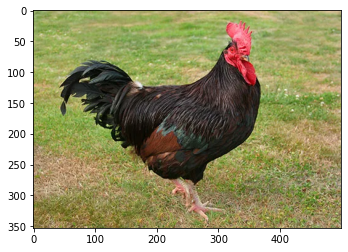

In [5]:
hen = plt.imread('assignment 4/hen.webp')
print("house dimentions: ",hen.shape)
plt.imshow(hen)

In [12]:
kernel = random.randint(-3,4,(5,5))
kernel

array([[-1,  3, -2,  2,  1],
       [ 0,  1,  1, -3,  3],
       [-3,  1,  0, -3,  0],
       [-1, -2,  1, -2,  3],
       [-1,  1,  0,  2,  1]])

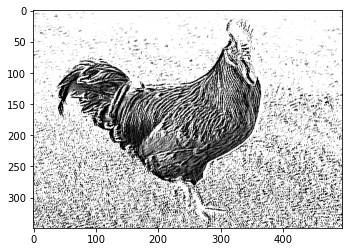

In [13]:

gray_hen = cv2.cvtColor(hen,cv2.COLOR_RGB2GRAY)
filtered = []
x,y = kernel.shape
const = np.sum(kernel) # did not used cause cv2.filter2D does not use

for i in range(gray_hen.shape[0]-x+1):
    row = []
    for j in range(gray_hen.shape[1]-y+1):
        calc = np.sum(np.multiply(kernel,gray_hen[i:i+x,j:j+y]))
        if calc<0:
            calc = 0
        elif calc>255:
            calc = 255
        row.append(calc)

    filtered.append(row)

filtered_hen = np.array(filtered)
plt.imshow(filtered_hen,cmap='gray')

In [4]:
?cv2.filter2D

Docstring:
filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
.   @brief Convolves an image with the kernel.
.   
.   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
.   the aperture is partially outside the image, the function interpolates outlier pixel values
.   according to the specified border mode.
.   
.   The function does actually compute correlation, not the convolution:
.   
.   \f[\texttt{dst} (x,y) =  \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}}  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
.   
.   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
.   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
.   anchor.y - 1)`.
.   
.   The function uses the DFT-based algorithm in case of sufficiently large kernels (~`11 x 11`

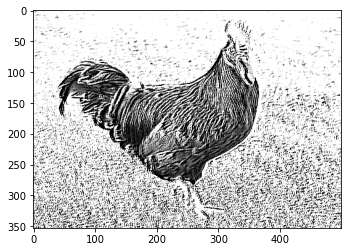

In [14]:
fil_hen2 = cv2.filter2D(gray_hen,0,kernel)
plt.imshow(fil_hen2,cmap='gray')

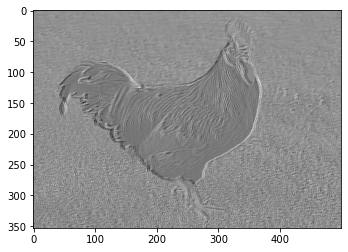

In [17]:
fil_hen3 = cv2.filter2D(gray_hen,5,kernel)
plt.imshow(fil_hen3,cmap='gray')